In [ ]:
# Final Project - Employment Diversity

In [37]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

%matplotlib inline


#demographics = '~/Desktop/Data-Science/ds_ga_40-master/final_project/Dataset/Tech_sector_diversity_demographics_2016.csv'
#train_number = pd.read_csv(demographics)

reveal = '~/Desktop/Data-Science/ds_ga_40-master/final_project/Dataset/Reveal_EEO1_for_2016.csv'
train = pd.read_csv(reveal)

#distributions = '~/Desktop/Data-Science/ds_ga_40-master/final_project/Dataset/Distributions_data_2016.csv'
#train_three = pd.read_csv(distributions)

In [38]:
# lets look at the dataset
train.head()

,company,year,race,gender,job_category,count
0,23andMe,2016,Hispanic_or_Latino,male,Executives,0
1,23andMe,2016,Hispanic_or_Latino,male,Managers,1
2,23andMe,2016,Hispanic_or_Latino,male,Professionals,7
3,23andMe,2016,Hispanic_or_Latino,male,Technicians,0
4,23andMe,2016,Hispanic_or_Latino,male,Sales workers,0


In [39]:
# lets look at the column names
train.columns

Index(['company', 'year', 'race', 'gender', 'job_category', 'count'], dtype='object')

In [40]:
# drop columns that are irrelevent/repetitive 

train.drop(columns=['year' , 'company'], inplace=True)
train.columns

Index(['race', 'gender', 'job_category', 'count'], dtype='object')

In [41]:
# remove all the totals from the database

train.drop(train.index[train['job_category'] == 'Totals'], inplace = True)
train.drop(train.index[train['job_category'] == 'Previous_totals'], inplace = True)
train.drop(train.index[train['race'] == 'Overall_totals'], inplace = True)

In [42]:

train.describe()

,race,gender,job_category,count
count,3500,3500,3500,3500
unique,7,2,10,386
top,American_Indian_Alaskan_Native,female,Technicians,0
freq,500,1750,350,1883


In [43]:
# looking to see if we need to change the data types for future calculations
train.dtypes

race            object
gender          object
job_category    object
count           object
dtype: object

In [44]:
# turn the 'count' into intigers

train['count'] = pd.to_numeric(train['count'], errors='ignore')

In [45]:
# check the change is there
train.dtypes

race            object
gender          object
job_category    object
count            int64
dtype: object

In [46]:
# group jobs, races and genders

train.groupby(['job_category', 'race', 'gender']).agg({'count': ['mean', 'min', 'max']})

count      \
                                                                    mean min   
job_category           race                                gender              
Administrative support American_Indian_Alaskan_Native      female   3.76   0   
                                                           male     1.40   0   
                       Asian                               female  60.92   1   
                                                           male    37.04   0   
                       Black_or_African_American           female  69.56   0   
...                                                                  ...  ..   
operatives             Native_Hawaiian_or_Pacific_Islander male     0.12   0   
                       Two_or_more_races                   female   0.08   0   
                                                           male     0.24   0   
                       White                               female  19.20   0   
                                                           male    17.24   0   

                                                                        
                                                                   max  
job_category           race                                gender       
Administrative support American_Indian_Alaskan_Native      female   17  
                                                           male     13  
                       Asian                               female  498  
                                                           male    338  
                       Black_or_African_American           female  472  
...                                                                ...  
operatives             Native_Hawaiian_or_Pacific_Islander male      2  
                       Two_or_more_races                   female    2  
                                                           male      3  
                       White                               female  458  
                                                           male    316  

[140 rows x 3 columns]

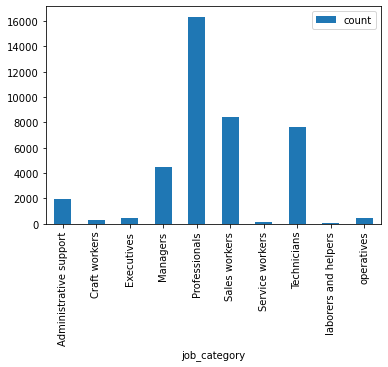

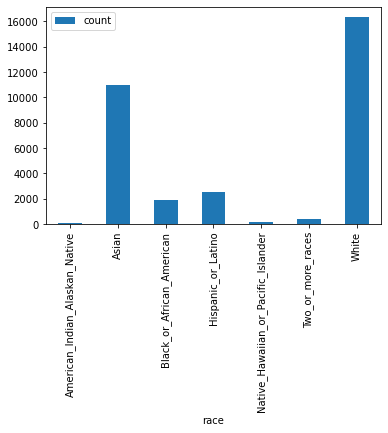

In [47]:
# visualising the dataset

train.groupby('job_category').max().plot(kind = 'bar');
train.groupby('race').max().plot(kind = 'bar');


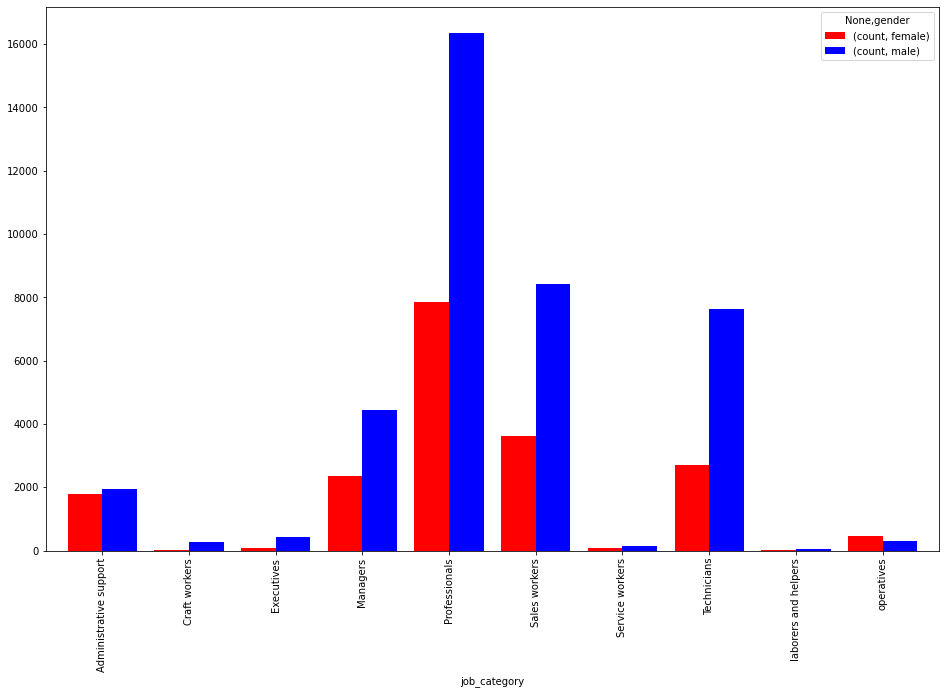

In [48]:
# more visualising 
train.groupby(['job_category', 'gender']).max().unstack().plot(kind = 'bar', width = 0.8, figsize = (16,10), color = ['r', 'b']);


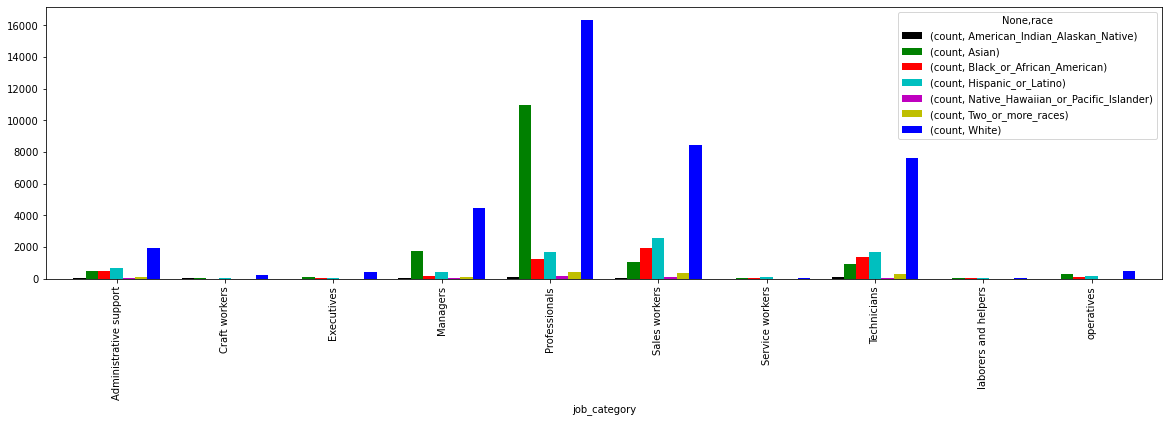

In [49]:
train.groupby(['job_category',  'race']).max().unstack().plot(kind = 'bar', width = 0.8, figsize = (20,5), color = ['k', 'g', 'r', 'c', 'm', 'y', 'b']);


In [55]:
# this is where I am at. All the code above here is sound. Below I am attempting to follow the 13.decisiontree 
# Building a Classification Tree in scikit-learn

In [ ]:
# following the following method [32] 13-decision-trees/decision_trees

# next step is to turn the gender into bool, race into intigers, and job_category into ABCDE etc.. similar to 'embarked'

In [52]:
train.tail(10)

,race,gender,job_category,count
4476,White,male,Executives,93
4477,White,male,Professionals,533
4478,White,male,Technicians,314
4479,White,male,Sales workers,60
4480,White,male,Administrative support,113
4481,White,male,Craft workers,54
4482,White,male,operatives,316
4483,White,male,laborers and helpers,2
4484,White,male,Service workers,32
4487,White,male,Managers,304


In [55]:
train['job_category'].unique()

array(['Executives', 'Managers', 'Professionals', 'Technicians',
       'Sales workers', 'Administrative support', 'Craft workers',
       'operatives', 'laborers and helpers', 'Service workers'],
      dtype=object)

In [ ]:
#  grouped = df.groupby("class")

In [65]:
jobs = train.groupby("job_category")

In [67]:
#jobs.tail()

,race,gender,job_category,count
4428,Native_Hawaiian_or_Pacific_Islander,male,Executives,0
4429,Native_Hawaiian_or_Pacific_Islander,male,Professionals,1
4430,Native_Hawaiian_or_Pacific_Islander,male,Technicians,1
4431,Native_Hawaiian_or_Pacific_Islander,male,Sales workers,0
4432,Native_Hawaiian_or_Pacific_Islander,male,Administrative support,1
4433,Native_Hawaiian_or_Pacific_Islander,male,Craft workers,1
4434,Native_Hawaiian_or_Pacific_Islander,male,operatives,2
4435,Native_Hawaiian_or_Pacific_Islander,male,laborers and helpers,0
4436,Native_Hawaiian_or_Pacific_Islander,male,Service workers,0
4439,Native_Hawaiian_or_Pacific_Islander,male,Managers,0


In [14]:
train['race'].unique()

array(['Hispanic_or_Latino', 'White', 'Black_or_African_American',
       'Native_Hawaiian_or_Pacific_Islander', 'Asian',
       'American_Indian_Alaskan_Native', 'Two_or_more_races'],
      dtype=object)

In [15]:
train.shape

(3500, 4)

In [16]:
train.head(20)

,race,gender,job_category,count
0,Hispanic_or_Latino,male,Executives,0
1,Hispanic_or_Latino,male,Managers,1
2,Hispanic_or_Latino,male,Professionals,7
3,Hispanic_or_Latino,male,Technicians,0
4,Hispanic_or_Latino,male,Sales workers,0
5,Hispanic_or_Latino,male,Administrative support,0
6,Hispanic_or_Latino,male,Craft workers,0
7,Hispanic_or_Latino,male,operatives,0
8,Hispanic_or_Latino,male,laborers and helpers,0
9,Hispanic_or_Latino,male,Service workers,0


In [41]:
#encode race into0 - 6
#train['race'] = train.race.map({'Hispanic_or_Latino' :0, 'White': 1, 'Black_or_African_American': 2,
#       'Native_Hawaiian_or_Pacific_Islander': 3, 'Asian': 4,
#       'American_Indian_Alaskan_Native': 5, 'Two_or_more_races': 6})

In [17]:
# Encode male as 0 and female as 1.
train['gender'] = train.gender.map({'male':0, 'female':1})

In [27]:
train.head(20)

,race,gender,job_category,count
0,Hispanic_or_Latino,0,Executives,0
1,Hispanic_or_Latino,0,Managers,1
2,Hispanic_or_Latino,0,Professionals,7
3,Hispanic_or_Latino,0,Technicians,0
4,Hispanic_or_Latino,0,Sales workers,0
5,Hispanic_or_Latino,0,Administrative support,0
6,Hispanic_or_Latino,0,Craft workers,0
7,Hispanic_or_Latino,0,operatives,0
8,Hispanic_or_Latino,0,laborers and helpers,0
9,Hispanic_or_Latino,0,Service workers,0


In [28]:
X = train.drop('job_category', axis=1)
y = train['job_category']

In [33]:
X.head(20)

,race,gender,count
0,Hispanic_or_Latino,0,0
1,Hispanic_or_Latino,0,1
2,Hispanic_or_Latino,0,7
3,Hispanic_or_Latino,0,0
4,Hispanic_or_Latino,0,0
5,Hispanic_or_Latino,0,0
6,Hispanic_or_Latino,0,0
7,Hispanic_or_Latino,0,0
8,Hispanic_or_Latino,0,0
9,Hispanic_or_Latino,0,0


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [35]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

ValueError: could not convert string to float: 'Asian'

In [36]:
# find the gini index

# http://localhost:8888/notebooks/Desktop/Data-Science/ds_ga_40-master/10-train-test-split-bias-variance/bias-and-variance.ipynb

from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


# Encode male as 0 and female as 1.
train['gender'] = train.gender.map({'male':0, 'female':1})

#encode race into0 - 6
train['race'] = train.race.map({'Hispanic_or_Latino' :0, 'White': 1, 'Black_or_African_American': 2,
       'Native_Hawaiian_or_Pacific_Islander': 3, 'Asian': 4,
       'American_Indian_Alaskan_Native': 5, 'Two_or_more_races': 6})

# Create a DataFrame of dummy variables for Job Categories.
jobs = pd.get_dummies(train.job_category, prefix='jobs')
jobs.drop(jobs.columns[0], axis=1, inplace=True)


# Concatenate the original DataFrame and the dummy DataFrame.
train = pd.concat([train, jobs], axis=1)

# Print the updated DataFrame.
train.head()

,race,gender,job_category,count,jobs_Craft workers,jobs_Executives,jobs_Managers,jobs_Professionals,jobs_Sales workers,jobs_Service workers,jobs_Technicians,jobs_laborers and helpers,jobs_operatives
0,0,NaN,Executives,0,0,1,0,0,0,0,0,0,0
1,0,NaN,Managers,1,0,0,1,0,0,0,0,0,0
2,0,NaN,Professionals,7,0,0,0,1,0,0,0,0,0
3,0,NaN,Technicians,0,0,0,0,0,0,0,1,0,0
4,0,NaN,Sales workers,0,0,0,0,0,1,0,0,0,0


In [ ]:
# this is where I am up to .... read below errors. Need to work out how to change the race into a bool, do i create
# a whole Y-matrix similar to the jobs? or do I need to do a double tree, so run this tree then run through a second
# tree that then has race in a bool form? 

In [ ]:
# actually, the bool form for the job types does not include the correct counts for each column. 
# Perhaps do race as dummy variables?

In [20]:
# merge the series together to form the matrix 
train.merge(jobs, left_index= "count", right_index="job_category", how="left")

ValueError: left_index parameter must be of type bool, not <class 'str'>

In [68]:
train.columns

Index(['race', 'gender', 'job_category', 'count', 'jobs_Craft workers',
       'jobs_Executives', 'jobs_Managers', 'jobs_Professionals',
       'jobs_Sales workers', 'jobs_Service workers', 'jobs_Technicians',
       'jobs_laborers and helpers', 'jobs_operatives'],
      dtype='object')

In [79]:
# df.drop('a', axis=1) 

train.drop('job_category', axis = 1, inplace = True)

In [80]:
train.dtypes

race                         object
gender                        int64
count                         int64
jobs_Craft workers            uint8
jobs_Executives               uint8
jobs_Managers                 uint8
jobs_Professionals            uint8
jobs_Sales workers            uint8
jobs_Service workers          uint8
jobs_Technicians              uint8
jobs_laborers and helpers     uint8
jobs_operatives               uint8
dtype: object

In [81]:
train.head()

,race,gender,count,jobs_Craft workers,jobs_Executives,jobs_Managers,jobs_Professionals,jobs_Sales workers,jobs_Service workers,jobs_Technicians,jobs_laborers and helpers,jobs_operatives
0,Hispanic_or_Latino,0,0,0,1,0,0,0,0,0,0,0
1,Hispanic_or_Latino,0,1,0,0,1,0,0,0,0,0,0
2,Hispanic_or_Latino,0,7,0,0,0,1,0,0,0,0,0
3,Hispanic_or_Latino,0,0,0,0,0,0,0,0,1,0,0
4,Hispanic_or_Latino,0,0,0,0,0,0,1,0,0,0,0


In [74]:
# merge the series together to form the matrix 
# train.merge(jobs, left_index= "jobs_Executives", right_index="index", how="left")

ValueError: left_index parameter must be of type bool, not <class 'str'>

In [82]:
# Define X and y.
feature_cols = ['race', 'gender', 'count', 'jobs_Craft workers' , 'jobs_Executives', 'jobs_Managers', 'jobs_Professionals', 'jobs_Sales workers', 'jobs_Service workers', 'jobs_Technicians', 'jobs_laborers and helpers', 'jobs_operatives']

X = train[feature_cols]
y = train.jobs



# X_train, X_test, y_train, y_test = train_test_split(X, y)

# train test split first

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

AttributeError: 'DataFrame' object has no attribute 'jobs'

In [73]:
# Fit a classification tree with max_depth=3 on all data.
from sklearn.tree import DecisionTreeClassifier

treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X, y)

ValueError: could not convert string to float: 'Hispanic_or_Latino'

In [ ]:
# following the following method [32] 13-decision-trees/decision_trees

# next step is to turn the gender into bool, race into intigers, and job_category into ABCDE etc.. similar to 'embarked'

In [ ]:
# prepare data to build a classification tree

In [39]:
X.shape

(3500, 3)

In [40]:
X_train.shape

(2450, 3)

In [194]:
train.groupby('job_category').agg([ 'mean', 'min', 'max'])

count           
                              mean min    max
job_category                                 
Administrative support   65.720000   0   1948
Craft workers             2.011429   0    258
Executives               10.814286   0    422
Managers                158.414286   0   4444
Professionals           609.874286   0  16352
Sales workers           125.200000   0   8414
Service workers           2.745714   0    132
Technicians              93.668571   0   7646
laborers and helpers      0.554286   0     39
operatives                5.502857   0    458

In [109]:
# Define X and y.
feature_cols = ['race', 'gender', 'job_category', 'count']

X = train[feature_cols]
y = train.count

In [17]:
# Encode male as 0 and female as 1.
train['gender'] = train.gender.map({'male':0, 'female':1})

In [18]:
train.head()

,race,gender,job_category,count
0,Hispanic_or_Latino,0,Executives,0
1,Hispanic_or_Latino,0,Managers,1
2,Hispanic_or_Latino,0,Professionals,7
3,Hispanic_or_Latino,0,Technicians,0
4,Hispanic_or_Latino,0,Sales workers,0
